IA & Data science (LU3IN0226) -- 2021-2022
--------
*&copy; Equipe pédagogique: Vincent Guigue, Christophe Marsala, Olivier Schwander.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

KLICH NourElHouda && BESSAD Melina

Ce projet peut être fait (c'est même recommandé) en binôme. Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-1</tt> et rajouter à la suite de <tt>projet-1</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-1-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 1 - mars 2022


<font size="+1" color="RED"><b>Date de rendu : vendredi 25 mars, 18h au plus tard</b></font>
<br />


Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur:
- les données Bases_IADS : cela correspond à un problème de classification binaire
- les données Bases_IADS_multiclasses : cela correspond à un problème de classification multiclasses

Très important : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivantes:

          -- ce_notebook.ipynb
          -- Bases_IADS/ 
              -- README.txt
              -- train.csv
              -- test.csv
              -- eval.csv
              -- names.csv
          -- Bases_IADS_multiclasses/
              -- README.txt
              -- train_multi.csv
              -- test_multi.csv
              -- eval_multi.csv
              -- names_multi.csv

Dans le notebook, le chargement des fichiers de données considèrera donc cette arborescence.


Les fichiers de chaque répertoire correspondent à:
- fichier README.txt : donne des explications sur le contenu du répertoire
- fichier train*.csv : base d'apprentissage à utiliser pour construire le classfieur
- fichier test*.csv : base de test pour évaluer vous même le classifieur construit. Les exemples de ce fichier NE DOIVENT PAS être utilisés pour l'apprentissage du classifieur.
- fichier eval*.csv : fichier d'évaluation du classifieur (voir ci-dessous).

## Travail à faire

Pour chaque ensemble de données:
- les 2 algorithmes d'apprentissage knn et perceptron doivent être expérimentés et comparés (ATTENTION: on ne veut que des algorithmes que vous avez implémentés vous-même dans cette UE).
- des résultats d'expérimentations pourront être : comparaison des taux de bonne classification apprentissage / test (avec validation croisée), visualisation, etc.
- de plus, un fichier `eval.csv` est fourni. Ce fichier contient des descriptions associées à un "faux" label. Dans votre compte-rendu, vous devez fournir un fichier CSV qui donne, pour chaque exemple du fichier `eval.csv`la classe trouvée par votre meilleur classifieur. Ainsi, le fichier CSV à rendre doit comporter 2 colonnes et autant de lignes que d'exemples (une ligne par exemple du fichier eval):<br>
            IDENTIFIANT;CLASSE_TROUVEE_POUR_CET_EXEMPLE
            ...
Le résultat de classification vous sera donné en retour (nous connaissons la vraie classe des exemples de ce fichier...).

Vos **expérimentations doivent être expliquées** (utilisez des boîtes Markdown pour saisir vos explications):
- une argumentation du type *"pourquoi vous avez fait cette expérimentation"* doit être fournie;
- une analyse succincte du résultat fourni doit être aussi donnée.


Par exemple (indicatif): choix de $k$ pour le knn:
- argumentation : pour décider quelle peut être la valeur de $k$ optimale, on décide de tester plusieurs valeurs différentes et de comparer les taux de bonne classification sur la base de test obtenus.
- analyse du résultat: on remarque que la valeur $k$ suivante fournie le meilleur résultat.



## Travail à rendre
Ce qui doit être rendu : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement)
- ce notebook, dans lequel vous avez reporté toutes les fonctions que vous utilisez : ce notebook doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). Les fichiers de données ne doivent pas être inclus dans votre archive !
- un fichier CSV dont le nom est de la forme: *projet-1-Nom1_Nom2.csv* (sur le modèle du nom du notebook) qui donne la classe de chaque exemple du fichier `eval.csv` trouvée par votre classifieur.


**Remarque**: en considérant que les algorithmes knn et perceptron ont été réalisés lors des séances de TME 1 à 6, le travail demandé pour ce projet correspond à, au plus, une séance complète de TME.

In [47]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline  
import random
import math
import pickle as pkl
import csv
# Les instructions suivantes sont TRES utile pour recharger automatiquement 
# le code modifié dans les librairies externes
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Classifieur "Classifier"

In [48]:
class Classifier:
    """ Classe (abstraite) pour représenter un classifieur
        Attention: cette classe est ne doit pas être instanciée.
    """
    
    def __init__(self, input_dimension):
        """ Constructeur de Classifier
            Argument:
                - intput_dimension (int) : dimension de la description des exemples
            Hypothèse : input_dimension > 0
        """
        self.input_dimension = input_dimension
        
    def train(self, desc_set, label_set):
        """ Permet d'entrainer le modele sur l'ensemble donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """        
        raise NotImplementedError("Please Implement this method")
    
    def score(self,x):
        """ rend le score de prédiction sur x (valeur réelle)
            x: une description
        """
        raise NotImplementedError("Please Implement this method")
    
    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description
        """
        raise NotImplementedError("Please Implement this method")

    def accuracy(self, desc_set, label_set):
        """ Permet de calculer la qualité du système sur un dataset donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """
        nb_bien_classe=0
        for i in range(len(desc_set)):
            if self.predict(desc_set[i]) == label_set[i]:
                nb_bien_classe = nb_bien_classe + 1
        return nb_bien_classe/len(desc_set)

## Fronctions de Validation croisée

In [49]:
def crossval(X, Y, n_iterations, iteration):
    """extrait 02 sous data sets un d'apprentissage et l'autre de test"""
    i_deb_test = iteration*(len(X)//n_iterations)
    i_fin_test = (iteration+1)*(len(X)//n_iterations)-1
    Ytest = Y[i_deb_test:i_fin_test+1]
    Xtest = X[i_deb_test:i_fin_test+1]
    Xapp = np.concatenate((X[0:i_deb_test],X[i_fin_test+1:len(X)]))
    Yapp = np.concatenate((Y[0:i_deb_test],Y[i_fin_test+1:len(X)]))
    return Xapp, Yapp, Xtest, Ytest

def crossval_strat(X, Y, n_iterations, iteration):
    #classe 1
    w1 = np.where(Y==1)[0]
    Y1 = Y[w1]
    X1 = X[w1]
    #classe -1
    w_1 = np.where(Y==-1)[0]
    Y_1 = Y[w_1]
    X_1 = X[w_1]
    Xapp1, Yapp1, Xtest1, Ytest1 = crossval(X1,Y1,n_iterations,iteration)
    Xapp2, Yapp2, Xtest2, Ytest2 = crossval(X_1,Y_1,n_iterations,iteration)
    return np.concatenate((Xapp2,Xapp1)), np.concatenate((Yapp2,Yapp1)),np.concatenate((Xtest2,Xtest1)),np.concatenate((Ytest2,Ytest1))



## -Fonction d'analyse de performances:

In [50]:
def analyse_perfs(liste_reel):
    if (len(liste_reel)==0):
        return (0,0)
    return (np.mean(liste_reel),np.var(liste_reel))    

 ## - Fonctions visualisation :

In [51]:
def reduction_2d(X,Y):
    Xu = np.array(X, dtype=float) # conversion de type pour une meilleure compatibilité
    Yu = np.array(Y, dtype=float)
    # 1) calcul des vecteurs propres
    lam_u, V_u = np.linalg.eig(Xu.T @ Xu)
    # 2) affichage (print)
    # 3) tri et sélection des 2 vecteurs associés aux 2 plus grandes valeurs propres 
    idx_max1 = np.argsort(lam_u)[len(lam_u)-1]
    idx_max2 = np.argsort(lam_u)[len(lam_u)-2]
    V_p1 = V_u[:,idx_max1]
    V_p2 = V_u[:,idx_max2]
    # 4) affichage (plot) avec un code couleur pour les classes
    v1_etoile = Xu@V_p1#projection sur le vecteur propre 1
    v2_etoile = Xu@V_p2
    return (v1_etoile,v2_etoile,Yu)
    
def plot2DSet(desc,labels):    
    """ ndarray * ndarray -> affichage
        la fonction doit utiliser la couleur 'red' pour la classe -1 et 'blue' pour la +1
    """
   
    # Extraction des exemples de classe -1:
    data_negatifs = desc[labels == -1]
    # Extraction des exemples de classe +1:
    data_positifs = desc[labels == +1]
    # Affichage de l'ensemble des exemples :
    plt.scatter(data_negatifs[:,0],data_negatifs[:,1],marker='o', color="red") # 'o' rouge pour la classe -1
    plt.scatter(data_positifs[:,0],data_positifs[:,1],marker='x', color="blue") # 'x' bleu pour la classe +1
    
def plot_frontiere(desc_set, label_set, classifier, step=30):
    """ desc_set * label_set * Classifier * int -> NoneType
        Remarque: le 4e argument est optionnel et donne la "résolution" du tracé: plus il est important
        et plus le tracé de la frontière sera précis.        
        Cette fonction affiche la frontière de décision associée au classifieur
    """
    mmax=desc_set.max(0)
    mmin=desc_set.min(0)
    x1grid,x2grid=np.meshgrid(np.linspace(mmin[0],mmax[0],step),np.linspace(mmin[1],mmax[1],step))
    grid=np.hstack((x1grid.reshape(x1grid.size,1),x2grid.reshape(x2grid.size,1)))
    
    # calcul de la prediction pour chaque point de la grille
    res=np.array([classifier.predict(grid[i,:]) for i in range(len(grid)) ])
    res=res.reshape(x1grid.shape)
    # tracer des frontieres
    # colors[0] est la couleur des -1 et colors[1] est la couleur des +1
    plt.contourf(x1grid,x2grid,res,colors=["darksalmon","skyblue"],levels=[-1000,0,1000])    

# 1-les données Bases_IADS : classification binaire

In [52]:
###Extraction des données train
data_binaire_tr = pd.read_csv("Bases_IADS/train.csv",sep=';',header=None)
data_bin_array_tr = np.array(data_binaire_tr)
l,c = data_bin_array_tr.shape
X_binaire_train = data_bin_array_tr[:,1:c-1]
Y_binaire_train = data_bin_array_tr[:,-1]

###Extraction des données test
data_binaire_test = pd.read_csv("Bases_IADS/test.csv",sep=';',header=None)
data_bin_array_test = np.array(data_binaire_test)
l,c = data_bin_array_test.shape
X_binaire_test = data_bin_array_test[:,1:c-1]
Y_binaire_test = data_bin_array_test[:,-1]

### - Visualisation des données

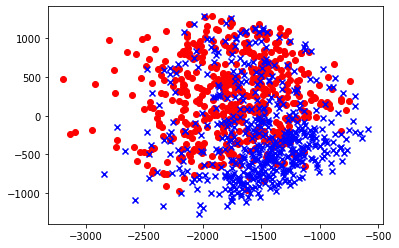

In [55]:
(v1_etoile,v2_etoile,Yu) = reduction_2d(X_binaire_train,Y_binaire_train)
X_2d = np.array((v1_etoile,v2_etoile)).T
Y_2d = Yu
plot2DSet(X_2d,Y_2d)


## 1.1- Apprentissage avec le classifieur Knn : 

### - Classifieur KNN :


In [54]:

class ClassifierKNN(Classifier):
    """ Classe pour représenter un classifieur par K plus proches voisins.
        Cette classe hérite de la classe Classifier
    """
    
    def __init__(self, input_dimension, k):
        """ Constructeur de Classifier
            Argument:
                - intput_dimension (int) : dimension d'entrée des exemples
                - k (int) : nombre de voisins à considérer
            Hypothèse : input_dimension > 0
        """
        super().__init__(input_dimension)
        self.k=k
        
    def score(self,x):
        """ rend la proportion de +1 parmi les k ppv de x (valeur réelle)
            x: une description : un ndarray
        """
        tab_dist=[]
        for i in range(len(self.data_desc)):
            tab_dist.append(np.dot(x-self.data_desc[i],x-self.data_desc[i]))
        tab_idx_tri = np.argsort(tab_dist)#les indices ordonnés des distances  
        nb_pos = 0
        for i in tab_idx_tri[0:self.k]: 
            if (self.data_label[i]== 1):
                nb_pos = nb_pos + 1
        return 2*((nb_pos/self.k)-0.5)
        
    def predict(self, x):
        """ rend la prediction sur x (-1 ou +1)
            x: une description : un ndarray
        """
        score = self.score(x)
        if score > 0:
            return 1
        return -1
    def train(self, desc_set, label_set):
        """ Permet d'entrainer le modele sur l'ensemble donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """        
        self.data_desc = desc_set
        self.data_label = label_set

### - Données sans validation croisée :




#### Choix du k le plus optimal  :

---------------k =  1 ------------------------
Accuracy (test) pour  1 : 0.935
---------------k =  3 ------------------------
Accuracy (test) pour  3 : 0.943
---------------k =  5 ------------------------
Accuracy (test) pour  5 : 0.946
---------------k =  7 ------------------------
Accuracy (test) pour  7 : 0.945
---------------k =  9 ------------------------
Accuracy (test) pour  9 : 0.944
---------------k =  11 ------------------------
Accuracy (test) pour  11 : 0.942
---------------k =  13 ------------------------
Accuracy (test) pour  13 : 0.943
---------------k =  15 ------------------------
Accuracy (test) pour  15 : 0.942
---------------k =  17 ------------------------
Accuracy (test) pour  17 : 0.938
---------------k =  19 ------------------------
Accuracy (test) pour  19 : 0.932
---------------k =  21 ------------------------
Accuracy (test) pour  21 : 0.928
---------------k =  23 ------------------------
Accuracy (test) pour  23 : 0.931

le meilleur k est donc : 5


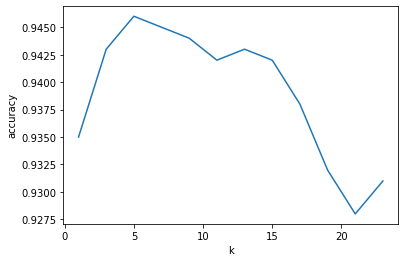

In [64]:
# on stocke les accuracies dans une liste :
accuracies_train = []
accuracies_test = []

# seuil max des valeurs de k à regarder:
seuil_k = len(X_binaire_train) // 40

# toutes les valeurs de k à regarder:
valeurs_k = [k for k in range(1,seuil_k,2)]
for k in valeurs_k:
    # Création d'un knn avec k et 2 dimensions pour les données
    classifierKNN = ClassifierKNN(c-2,k)
    # Entraînement du classifier:
    classifierKNN.train(X_binaire_train,Y_binaire_train)
    # acccuracies pour test
    tmp = classifierKNN.accuracy(X_binaire_test,Y_binaire_test)
    print("---------------k = ",k,"------------------------")
    print("Accuracy (test) pour ",k,":",tmp)
    accuracies_test.append(tmp)
plt.plot(valeurs_k,accuracies_test)
plt.xlabel("k")
plt.ylabel("accuracy")
k_best=valeurs_k[np.argmax(accuracies_test)]
print("\nle meilleur k est donc :",k_best)

* On remarque donc qu'après des tests avec plusieurs valeurs de k que celui qui nous donne la meilleure performance est 5

In [57]:
classifierKNN = ClassifierKNN(c-2,k_best)
classifierKNN.train(X_binaire_train,Y_binaire_train)
print("Accuracy (train) pour ",classifierKNN.accuracy(X_binaire_train,Y_binaire_train))
print("Accuracy (test) pour ",classifierKNN.accuracy(X_binaire_test,Y_binaire_test))

Accuracy (train) pour  0.965
Accuracy (test) pour  0.946


### -Données avec validation croisée:

In [58]:
###EXtraction des données binaires de validation croisée
np.random.seed(42)   # on prend 42 comme graine

index = np.random.permutation(len(X_binaire_train)) # mélange des index
XbinMelange = X_binaire_train[index]
YbinMelange = Y_binaire_train[index]


In [59]:
niter = 10
liste_classif = []
acc_vc_knn=[]
for i in range(1,niter):
    Xapp,Yapp,X_test,Y_test = crossval_strat(XbinMelange, YbinMelange,niter,i)
    knn1 = ClassifierKNN(c-2,k_best)
    print("-----------------------Itération ",i,"-------------------------")
    print("taille base appretissage = ",len(Xapp)," taille base de test = ",len(X_test))
    knn1.train(Xapp, Yapp)
    acc=knn1.accuracy(X_test, Y_test)
    print("accuracy test = ",acc)
    acc_vc_knn.append(acc)
    

-----------------------Itération  1 -------------------------
taille base appretissage =  900  taille base de test =  100
accuracy test =  0.96
-----------------------Itération  2 -------------------------
taille base appretissage =  900  taille base de test =  100
accuracy test =  0.97
-----------------------Itération  3 -------------------------
taille base appretissage =  900  taille base de test =  100
accuracy test =  0.93
-----------------------Itération  4 -------------------------
taille base appretissage =  900  taille base de test =  100
accuracy test =  0.93
-----------------------Itération  5 -------------------------
taille base appretissage =  900  taille base de test =  100
accuracy test =  0.95
-----------------------Itération  6 -------------------------
taille base appretissage =  900  taille base de test =  100
accuracy test =  0.96
-----------------------Itération  7 -------------------------
taille base appretissage =  900  taille base de test =  100
accuracy test 

## 1.2- Apprentissage avec le classifieur Perceptron: 

###  Classifieur Perceptron

In [60]:
class ClassifierPerceptron(Classifier):
    """ Perceptron de Rosenblatt
    """
    learning_rate = 0
    w=[]
    def __init__(self, input_dimension, learning_rate, init=0):
        """ Constructeur de Classifier
            Argument:
                - input_dimension (int) : dimension de la description des exemples (>0)
                - learning_rate : epsilon
                - init est le mode d'initialisation de w: 
                    - si 0 (par défaut): initialisation à 0 de w,
                    - si 1 : initialisation par tirage aléatoire de valeurs petites
        """
        self.input_dimension = input_dimension
        self.learning_rate = learning_rate
        if init==0:
            self.w =np.zeros(input_dimension)
        else:
            v = np.array([random.random() for i in range(input_dimension)]) #valeur entre [0,1[
            self.w = (2*v-1)*learning_rate
        
    def train_step(self, desc_set, label_set):
        """ Réalise une unique itération sur tous les exemples du dataset
            donné en prenant les exemples aléatoirement.
            Arguments:
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
        """ 
        idx_set = [i for i in range(len(desc_set))]
        np.random.shuffle(idx_set)
        for i in idx_set : 
            y_hat = np.dot(desc_set[i],self.w)
            if y_hat*label_set[i]<=0:#erreur
                self.w = self.w + self.learning_rate*label_set[i]*desc_set[i]
                
                
    def train(self, desc_set, label_set, niter_max=100, seuil=0.001):
        """ Apprentissage itératif du perceptron sur le dataset donné.
            Arguments:
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
                - niter_max (par défaut: 100) : nombre d'itérations maximale
                - seuil (par défaut: 0.001) : seuil de convergence
            Retour: la fonction rend une liste
                - liste des valeurs de norme de différences
        """        
        liste_diff = []
        
# Chaque élément de data correspond 
# Chaque élément de data correspond 
        for i in range(niter_max):
            w_old = self.w.copy()
            self.train_step(desc_set, label_set)
            norme = np.linalg.norm(abs(w_old-self.w))
            liste_diff.append(norme)           
            if norme < seuil:#convergeance
                break
        return liste_diff
    
    
    def score(self,x):
        """ rend le score de prédiction sur x (valeur réelle)
            x: une description
        """
        return np.dot(x,self.w)
    
    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description
        """
        if self.score(x)<=0:
            return -1
        return 1

### -Données sans validation croisée :

Nb iterations réalisées:  63


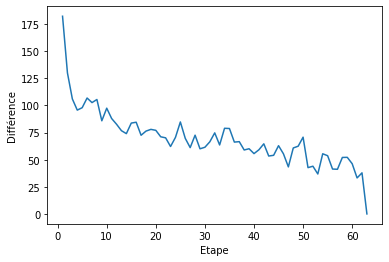

Accuracy finale sur les données train:  1.0
Accuracy finale sur les données test:  0.872


In [61]:
np.random.seed(42)   # on prend 42 comme graine

# Création d'un perceptron avec initialisation à 0 et le learning_rate ci-dessous:
learning_rate = 0.01
perceptron = ClassifierPerceptron(c-2,learning_rate)

# Apprentissage du perceptron jusqu'à convergence
les_variations = perceptron.train(X_binaire_train,Y_binaire_train)
print("Nb iterations réalisées: ", len(les_variations) )

# Traçage de la courbe des variations
plt.plot(range(1,len(les_variations)+1),les_variations)  
plt.ylabel('Différence')
plt.xlabel("Etape")
plt.show()

print("Accuracy finale sur les données train: ",perceptron.accuracy(X_binaire_train,Y_binaire_train))
print("Accuracy finale sur les données test: ",perceptron.accuracy(X_binaire_test,Y_binaire_test))

### Données avec validation croisée : 

In [62]:

niter = 10
acc_vc_perc=[]
for i in range(1,niter):
    perceptron1 = ClassifierPerceptron(c-2,learning_rate)
    Xapp,Yapp,X_test,Y_test = crossval_strat(XbinMelange, YbinMelange,niter,i)
    print("-----------------------Itération ",i,"-------------------------")
    print("taille base appretissage = ",len(Xapp)," taille base de test = ",len(X_test))
    perceptron1.train(Xapp, Yapp)
    acc=perceptron1.accuracy(X_test, Y_test)
    print("accuracy test = ",acc)
    acc_vc_perc.append(acc)
       

-----------------------Itération  1 -------------------------
taille base appretissage =  900  taille base de test =  100
accuracy test =  0.92
-----------------------Itération  2 -------------------------
taille base appretissage =  900  taille base de test =  100
accuracy test =  0.88
-----------------------Itération  3 -------------------------
taille base appretissage =  900  taille base de test =  100
accuracy test =  0.89
-----------------------Itération  4 -------------------------
taille base appretissage =  900  taille base de test =  100
accuracy test =  0.81
-----------------------Itération  5 -------------------------
taille base appretissage =  900  taille base de test =  100
accuracy test =  0.9
-----------------------Itération  6 -------------------------
taille base appretissage =  900  taille base de test =  100
accuracy test =  0.92
-----------------------Itération  7 -------------------------
taille base appretissage =  900  taille base de test =  100
accuracy test =

## 1.3- Comparaison entre le perceptron et le knn : 

### Sans validation croisée:

* On observe que les performances obtenues avec le classifieur KNN sur les données de test sans validation croisée sont meilleures que celles obtenues avec le classfieur Perceptron.

### Avec validation croisée:

- On représente dans un graphe les accuracies des données de tests à chaque itération avec validation croisée. On observe que les valeurs des accuracies de knn sont toujours meilleures que celles du perceptron.

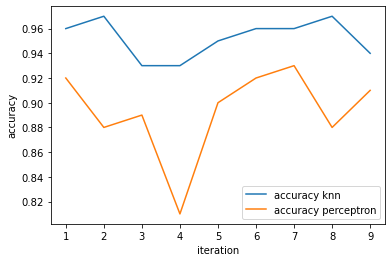

In [67]:
plt.plot([i for i in range(1,niter)],acc_vc_knn,label="accuracy knn")
plt.plot([i for i in range(1,niter)],acc_vc_perc,label="accuracy perceptron")
plt.xlabel("iteration")
plt.ylabel("accuracy")
plt.legend()
plt.show()

- On déduit donc que knn est meilleur que perceptron.

## 1.4 - Classification des données contenues dans le fichier "eval.csv" avec le KNN:

- On entraine notre meilleur classifieur Knn sur les données train qui nous ont été données et ensuite on fait la prédecition des classes pour les données du fichier eval et on les écrit dans un fichier csv.

In [19]:
####Extraction des données
data_eval = pd.read_csv("Bases_IADS/eval.csv",sep=';',header=None)
X_eval = np.array(data_eval)[:,1:c-1]
KNN = ClassifierKNN(c-2,k_best)
##phase d'apprentissage
KNN.train(X_binaire_train,Y_binaire_train)
# Ouvrir le fichier en mode écriture
fichier = open('projet-1-BESSAD_KLICH.csv','w')
# Créer l'objet fichier
obj = csv.writer(fichier)
for i in range(len(X_eval)):
    label_res=KNN.predict(X_eval[i])#on predit les classes
    ligne=(i,label_res)
    obj.writerow(ligne)
fichier.close()



# 2-les données Bases_IADS_multiclasses : classification multiclasses

In [20]:
##Extraction des données train
data_multi_tr = pd.read_csv("Bases_IADS_multiclasses/train_multi.csv",sep=';',header=None)
data_multi_array_tr = np.array(data_multi_tr)
l,c = data_multi_array_tr.shape
X_multi_train = data_multi_array_tr[:,1:c-1]
Y_multi_train = data_multi_array_tr[:,-1]


nb_classes = len(np.unique(Y_multi_train))#nombre de classes

###Extraction des données test
data_multi_test = pd.read_csv("Bases_IADS_multiclasses/test_multi.csv",sep=';',header=None)
data_multi_array_test = np.array(data_multi_test)
l,c = data_multi_array_test.shape
X_multi_test = data_multi_array_test[:,1:c-1]
Y_multi_test = data_multi_array_test[:,-1]

### -  Visualisation des données

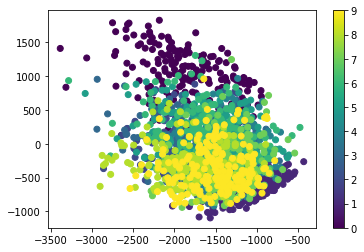

In [22]:
(v1_etoile,v2_etoile,Yu) = reduction_2d(X_multi_train,Y_multi_train)
plt.scatter(v1_etoile,v2_etoile,c=Yu)
plt.colorbar()    


## 2.1-Le classifieur  ClassifierKNN_MC

In [23]:
class ClassifierKNN_MC(Classifier):
    """ Classe pour représenter un classifieur par K plus proches voisins.
        Cette classe hérite de la classe Classifier
    """
    
    def __init__(self, input_dimension, k, nb_class):
        """ Constructeur de Classifier
            Argument:
                - intput_dimension (int) : dimension d'entrée des exemples
                - k (int) : nombre de voisins à considérer
                -nb_class (int) :  nombre de classes
            Hypothèse : input_dimension > 0
        """
        self.input_dimension = input_dimension
        self.nb_class = nb_class
        self.k=k
        self.data_desc = None
        self.data_label = None
        
    def score(self,x):
        """ rend la proportion de +1 parmi les k ppv de x (valeur réelle)
            x: une description : un ndarray
        """
        tab_dist = []
        for i in range(len(self.data_desc)):
            tab_dist.append(np.dot(x-self.data_desc[i],x-self.data_desc[i]))
        tab_idx_tri = np.argsort(tab_dist)#les indices ordonnés des distances  
        #on choisit de prendre les k classes minimisant les distances 
        classes_k = self.data_label[tab_idx_tri[:self.k]]     
        classes_uniques, nb_exemples = np.unique(classes_k, return_counts=True)
        idx_best_class=np.argmax(nb_exemples)
        return classes_uniques[idx_best_class]
    
    def predict(self, x):
        """ rend la prediction sur x (-1 ou +1)
            x: une description : un ndarray
        """
        return self.score(x)
          
        
    def train(self, desc_set, label_set):
        """ Permet d'entrainer le modele sur l'ensemble donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """        
        self.data_desc = desc_set
        self.data_label = label_set
            

### - Données sans validation croisée :

#### Choix du k le plus optimal  :

---------------k =  1 ------------------------
Accuracy (test) pour  1 : 0.8925
---------------k =  3 ------------------------
Accuracy (test) pour  3 : 0.8955
---------------k =  5 ------------------------
Accuracy (test) pour  5 : 0.9025
---------------k =  7 ------------------------
Accuracy (test) pour  7 : 0.899
---------------k =  9 ------------------------
Accuracy (test) pour  9 : 0.8925
le meilleur k est donc : 5


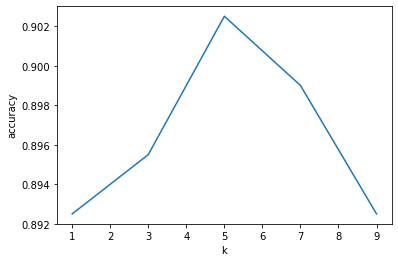

In [73]:
# on stocke les accuracies dans une liste :
accuracies_train = []
accuracies_test = []

# seuil max des valeurs de k à regarder:
seuil_k = len(X_multi_train) // 200

# toutes les valeurs de k à regarder:
valeurs_k = [k for k in range(1,seuil_k,2)]

for k in valeurs_k:
    # Création d'un knn avec k et c-2 dimensions pour les données
    classifierKNN_MC = ClassifierKNN_MC(c-2,k,nb_classes)
    # Entraînement du classifier:
    classifierKNN_MC.train(X_multi_train,Y_multi_train)
    # acccuracies pour test
    tmp = classifierKNN_MC.accuracy(X_multi_test,Y_multi_test)
    print("---------------k = ",k,"------------------------")
    print("Accuracy (test) pour ",k,":",tmp)
    accuracies_test.append(tmp)
plt.plot(valeurs_k,accuracies_test)
plt.xlabel("k")
plt.ylabel("accuracy")
k_best_multi = valeurs_k[np.argmax(accuracies_test)]
print("le meilleur k est donc :",k_best_multi)


In [12]:
knn_mc = ClassifierKNN_MC(c-2,k_best_multi,nb_classes)
knn_mc.train(X_multi_train,Y_multi_train)

print("Accuracy finale train : ",knn_mc.accuracy(X_multi_train,Y_multi_train))
print("Accuracy finale test : ",knn_mc.accuracy(X_multi_test,Y_multi_test))


Accuracy finale train :  0.936
Accuracy finale test :  0.9025


### - Données avec validation croisée :

In [26]:
###EXtraction des données multiclasses de validation croisée
np.random.seed(42)   # on prend 42 comme graine
index = np.random.permutation(len(X_multi_train)) # mélange des index
XmultiMelange = X_multi_train[index]
YmultiMelange = Y_multi_train[index]


In [28]:
niter = 10
acc_vc_knn_MC=[]
for i in range(1,niter):
    Xapp,Yapp,X_test,Y_test = crossval(XmultiMelange, YmultiMelange,niter,i)
    knn2_multi = ClassifierKNN_MC(c-2,k_best_multi,nb_classes)
    print("-----------------------Itération ",i,"-------------------------")
    print("taille base appretissage = ",len(Xapp)," taille base de test = ",len(X_test))
    knn2_multi.train(Xapp, Yapp)
    acc = knn2_multi.accuracy(X_test, Y_test)
    print("accuracy test = ",acc)
    acc_vc_knn_MC.append(acc)
    

-----------------------Itération  1 -------------------------
taille base appretissage =  1800  taille base de test =  200
accuracy test =  0.9
-----------------------Itération  2 -------------------------
taille base appretissage =  1800  taille base de test =  200
accuracy test =  0.9
-----------------------Itération  3 -------------------------
taille base appretissage =  1800  taille base de test =  200
accuracy test =  0.865
-----------------------Itération  4 -------------------------
taille base appretissage =  1800  taille base de test =  200
accuracy test =  0.885
-----------------------Itération  5 -------------------------
taille base appretissage =  1800  taille base de test =  200
accuracy test =  0.92
-----------------------Itération  6 -------------------------
taille base appretissage =  1800  taille base de test =  200
accuracy test =  0.9
-----------------------Itération  7 -------------------------
taille base appretissage =  1800  taille base de test =  200
accuracy

## 2.2- Apprentissage avec classifieur Perceptron_MC

In [31]:
class Perceptron_MC(Classifier):
    #on cree autant de perceptron que de classes 
    #on fait une boucle dans le train qui pour chaque classe i va encoder celle-ci à 1 et le reste à -1 et on refait cela nb_classe*nb_iteratiosn_train_fois
    def __init__(self,input_dimension,nb_classes):
        super().__init__(input_dimension)
        self.nb_classes = nb_classes
        self.liste_w = []
    def train(self,data_set,label_set, dim_perc,learning_rate,init,niter_max, seuil):
        for i in range(self.nb_classes):
            #on se ramène à un problème de classification binaire
            #classe 1 ( c'est la classe courante (la ième))
            w1 = np.where(label_set==i)[0]
            tmp_label1 = label_set[w1]
            tmp_label1[tmp_label1==i]=1
            tmp_data1 = data_set[w1]
            #classe -1 (le reste des classes)
            w_1 = np.where(label_set!=i)[0]
            tmp_label_1 = label_set[w_1]
            tmp_label_1[tmp_label_1!=i]=-1
            tmp_data_1 = data_set[w_1]
            p = ClassifierPerceptron(dim_perc,learning_rate,init)
            p.train(np.concatenate((tmp_data_1,tmp_data1)),np.concatenate((tmp_label_1,tmp_label1)), niter_max, seuil)   
            self.liste_w.append(p.w)
    def score(self,x):
        score=[]
        for i in range(self.nb_classes):
            score.append(np.dot(self.liste_w[i],x))
        return score
    def predict(self,x):
        return np.argmax(self.score(x)) 

### - Données sans validation croisée :

In [33]:
p_MC = Perceptron_MC(c-2,nb_classes)
p_MC.train(X_multi_train,Y_multi_train,c-2,0.001,0,100,0.01)

print("Accuracy finale train : ",p_MC.accuracy(X_multi_train,Y_multi_train))
print("Accuracy finale test : ",p_MC.accuracy(X_multi_test,Y_multi_test))

Accuracy finale train :  0.9965
Accuracy finale test :  0.8215


### - Données avec validation croisée :

In [74]:
niter = 10
acc_perc_multi = []
for i in range(1,niter):
    Xapp,Yapp,X_test,Y_test = crossval(XmultiMelange, YmultiMelange,niter,i)
    p1 = Perceptron_MC(c-2,nb_classes)
    print("-----------------------Itération ",i,"-------------------------")
    print("taille base appretissage = ",len(Xapp)," taille base de test = ",len(X_test))
    p1.train(Xapp, Yapp,c-2,0.001,0,100,0.01)
    acc_p = p1.accuracy(X_test, Y_test)
    print("accuracy test = ",acc_p)
    acc_perc_multi.append(acc_p)

-----------------------Itération  1 -------------------------
taille base appretissage =  1800  taille base de test =  200
accuracy test =  0.805
-----------------------Itération  2 -------------------------
taille base appretissage =  1800  taille base de test =  200
accuracy test =  0.84
-----------------------Itération  3 -------------------------
taille base appretissage =  1800  taille base de test =  200
accuracy test =  0.82
-----------------------Itération  4 -------------------------
taille base appretissage =  1800  taille base de test =  200
accuracy test =  0.88
-----------------------Itération  5 -------------------------
taille base appretissage =  1800  taille base de test =  200
accuracy test =  0.835
-----------------------Itération  6 -------------------------
taille base appretissage =  1800  taille base de test =  200
accuracy test =  0.83
-----------------------Itération  7 -------------------------
taille base appretissage =  1800  taille base de test =  200
accur

## 2.3-Comparaison

### - Sans validation croisée :

 - On observe que les performances obtenues avec le classifieur KNN_MC sur les données multiclasses de test sans validation croisée sont meilleures que celles obtenues avec le classfieur Perceptron_MC.

### - Avec validation croisée :

- On représente dans un graphe les accuracies des données de tests à chaque itération avec validation croisée. On observe que les valeurs des accuracies de knn sont toujours meilleures que celles du perceptron.

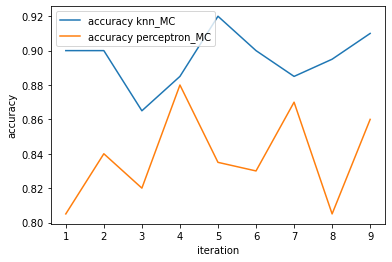

In [75]:
plt.plot([i for i in range(1,niter)],acc_vc_knn_MC,label="accuracy knn_MC")
plt.plot([i for i in range(1,niter)],acc_perc_multi,label="accuracy perceptron_MC")
plt.xlabel("iteration")
plt.ylabel("accuracy")
plt.legend()
plt.show()

 - On déduit donc que le classifieur knn_MC est meilleur que le perceptron_MC

## 2.4-  Classification des données contenues dans le fichier "eval.csv" avec le KNN_MC:

In [76]:
####Extraction des données
data_eval = pd.read_csv("Bases_IADS_multiclasses/eval_multi.csv",sep=';',header=None)
X_eval = np.array(data_eval)[:,1:c-1]

KNN_MC = ClassifierKNN_MC(c-2,k_best_multi,nb_classes)
KNN_MC.train(X_multi_train, Y_multi_train)

# Ouvrir le fichier en mode écriture
fichier = open('projet-1-BESSAD_KLICH_multi.csv','w')
# Créer l'objet fichier
obj_m = csv.writer(fichier)
for i in range(len(X_eval)):
    label_res = KNN_MC.predict(X_eval[i])
    ligne=(i,label_res)
    obj_m.writerow(ligne)
fichier.close()

